In [1]:
# importing libraries for data loading and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
import pickle as pickle
from nltk.tokenize import sent_tokenize, word_tokenize


In [2]:
# Function to aggregate all of the comments for a given subreddit(s)

# Data location example: reddit data for March 2018 downloaded to ~/parlancr/data/reddit/2018_03/
# File names: reddit_2018_03000000000000.csv - reddit_2018_03000000000047.csv

def export_subreddits(subs):
    
    selected_subreddits = pd.DataFrame()
    file_stem = './data/reddit/*/reddit_*.csv'
    
    for f in sorted(glob.glob(file_stem)):
        
        print('Loading comments from: ', f)
        partition_comments = pd.read_csv(f)
        selected_subreddits = selected_subreddits.append(partition_comments[partition_comments['subreddit'].isin(subs)], ignore_index = True)
        
    return selected_subreddits


In [ ]:
# Create data frame with all of the selected subreddit's (r/teenagers and r/The_Donald) comments
# Store the filtered data frame as a pickle / .pkl file for later EDA

reddit_data = export_subreddits(subs = ['teenagers','The_Donald'])

print(reddit_data['subreddit'].value_counts())

reddit_data.to_pickle('./data/reddit/subsets/reddit_data_all-teenagers-The_Donald.pkl')


In [3]:
# Create data frame with all of the selected subreddit's comments
# Store the filtered data frame as a pickle / .pkl file for later EDA

reddit_data = export_subreddits(subs = ['Republican','democrats','Conservative','Liberal','worldnews','news'])

print(reddit_data['subreddit'].value_counts())

reddit_data.to_pickle('./data/reddit/subsets/reddit_data_all-political.pkl')

Loading comments from:  ./data/reddit/2017_10/reddit_2017_10000000000000.csv
Loading comments from:  ./data/reddit/2017_10/reddit_2017_10000000000001.csv
Loading comments from:  ./data/reddit/2017_10/reddit_2017_10000000000002.csv
Loading comments from:  ./data/reddit/2017_10/reddit_2017_10000000000003.csv
Loading comments from:  ./data/reddit/2017_10/reddit_2017_10000000000004.csv
Loading comments from:  ./data/reddit/2017_10/reddit_2017_10000000000005.csv
Loading comments from:  ./data/reddit/2017_10/reddit_2017_10000000000006.csv
Loading comments from:  ./data/reddit/2017_10/reddit_2017_10000000000007.csv
Loading comments from:  ./data/reddit/2017_10/reddit_2017_10000000000008.csv
Loading comments from:  ./data/reddit/2017_10/reddit_2017_10000000000009.csv
Loading comments from:  ./data/reddit/2017_10/reddit_2017_10000000000010.csv
Loading comments from:  ./data/reddit/2017_10/reddit_2017_10000000000011.csv
Loading comments from:  ./data/reddit/2017_10/reddit_2017_10000000000012.csv

Loading comments from:  ./data/reddit/2018_01/reddit_2018_01000000000016.csv
Loading comments from:  ./data/reddit/2018_01/reddit_2018_01000000000017.csv
Loading comments from:  ./data/reddit/2018_01/reddit_2018_01000000000018.csv
Loading comments from:  ./data/reddit/2018_01/reddit_2018_01000000000019.csv
Loading comments from:  ./data/reddit/2018_01/reddit_2018_01000000000020.csv
Loading comments from:  ./data/reddit/2018_01/reddit_2018_01000000000021.csv
Loading comments from:  ./data/reddit/2018_01/reddit_2018_01000000000022.csv
Loading comments from:  ./data/reddit/2018_01/reddit_2018_01000000000023.csv
Loading comments from:  ./data/reddit/2018_01/reddit_2018_01000000000024.csv
Loading comments from:  ./data/reddit/2018_01/reddit_2018_01000000000025.csv
Loading comments from:  ./data/reddit/2018_01/reddit_2018_01000000000026.csv
Loading comments from:  ./data/reddit/2018_01/reddit_2018_01000000000027.csv
Loading comments from:  ./data/reddit/2018_01/reddit_2018_01000000000028.csv

In [ ]:
# Load trump tweet data from csv file and create data frame
# Store the data frame as a pickle / .pkl file for later EDA

trump_tweet_data = pd.read_csv('./data/twitter/trump_tweets/tweets.csv')

trump_tweet_data.to_pickle('./data/twitter/trump_tweets/trump_tweet_data.pkl')


In [2]:
# Load pickled data frames

reddit_all = pd.read_pickle('./data/reddit/subsets/reddit_data_all-teenagers-The_Donald.pkl')

twitter_trump = pd.read_pickle('./data/twitter/trump_tweets/trump_tweet_data.pkl')


In [3]:
# Filtering r/teenagers data to include only flared author's comments and loading The_Donald

reddit_teenagers_all = reddit_all[reddit_all['subreddit'].isin(['teenagers'])]

reddit_teenagers_filtered = reddit_teenagers_all[reddit_teenagers_all['author_flair_text'].str.match('1\d', na=False)]

reddit_theDonald = reddit_all[reddit_all['subreddit'].isin(['The_Donald'])]


r/teenagers (with flair filter): 1432570 comments
r/The_Donald: 5679672 comments
Trump Tweets: 30876 tweets


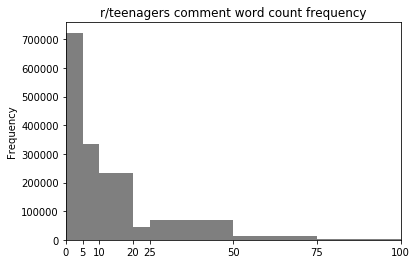

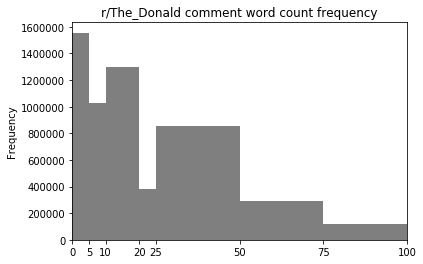

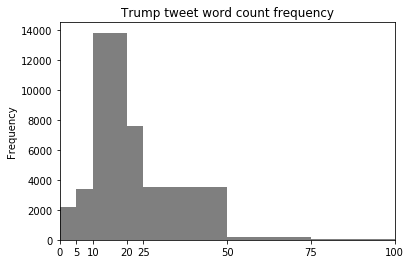

r/teenagers (with flair filter): 686192 comments between 5 - 50 words
r/The_Donald: 3580324 comments between 5 - 50 words
Trump Tweets: 28327 tweets between 5 - 50 words


In [4]:
# Preliminary EDA


print('r/teenagers (with flair filter): ' + str(reddit_teenagers_filtered.shape[0]) + ' comments')
print('r/The_Donald: ' + str(reddit_theDonald.shape[0]) + ' comments')
print('Trump Tweets: ' + str(twitter_trump.shape[0]) + ' tweets')

# Histograms of comment word length by source

plt.figure()
reddit_teenagers_filtered['body'].str.count(' ').plot.hist(color='k', 
                                                           alpha=0.5, 
                                                           bins=[0, 5, 10, 20, 25, 50, 75, 100], 
                                                           xlim = (0,100), 
                                                           xticks = [0, 5, 10, 20, 25, 50, 75, 100],
                                                           title = 'r/teenagers comment word count frequency'
                                                          )

plt.figure()
reddit_theDonald['body'].str.count(' ').plot.hist(color='k', 
                                                           alpha=0.5, 
                                                           bins=[0, 5, 10, 20, 25, 50, 75, 100], 
                                                           xlim = (0,100), 
                                                           xticks = [0, 5, 10, 20, 25, 50, 75, 100],
                                                           title = 'r/The_Donald comment word count frequency'
                                                          )

plt.figure()
twitter_trump['text'].str.count(' ').plot.hist(color='k', 
                                                           alpha=0.5, 
                                                           bins=[0, 5, 10, 20, 25, 50, 75, 100], 
                                                           xlim = (0,100), 
                                                           xticks = [0, 5, 10, 20, 25, 50, 75, 100],
                                                           title = 'Trump tweet word count frequency'
                                                          )


plt.show()

# Count of comments between 5 - 50 words from each source

print('r/teenagers (with flair filter): ' + str(reddit_teenagers_filtered[reddit_teenagers_filtered['body'].str.count(' ').between(5,50)].shape[0]) + ' comments between 5 - 50 words')
print('r/The_Donald: ' + str(reddit_theDonald[reddit_theDonald['body'].str.count(' ').between(5,50)].shape[0]) + ' comments between 5 - 50 words')
print('Trump Tweets: ' + str(twitter_trump[twitter_trump['text'].str.count(' ').between(5,50)].shape[0]) + ' tweets between 5 - 50 words')


In [ ]:
# Tokenizing text data to sentences and words and building vocabulary for each source

def sent_plus_word_tokenize(series):
    
    sentences = []
    words = []
    
    for comment in series:
        sentences.append(sent_tokenize(comment))
    
    flat_sentences = [item for sublist in sentences for item in sublist]
    
    for comment_sentence in flat_sentences:
        words.append(word_tokenize(comment_sentence))
    
    return words
        
reddit_teenagers_filtered_tokens = sent_plus_word_tokenize(reddit_teenagers_filtered['body'].dropna().values)
reddit_theDonald_tokens = sent_plus_word_tokenize(reddit_theDonald['body'].dropna().values)
twitter_trump_tokens = sent_plus_word_tokenize(twitter_trump['text'].dropna().values)



In [ ]:
# Saving initial tokenized data to pickle files

def autoPickle(objectPickle, file_path):
    with open(file_path, 'wb') as pickle_file:
        pickle.dump(objectPickle, pickle_file)

autoPickle(reddit_teenagers_filtered_tokens, './data/model_data/reddit_teenagers_filtered_tokens.pkl')
autoPickle(reddit_theDonald_tokens, './data/model_data/reddit_theDonald_tokens.pkl')
autoPickle(twitter_trump_tokens, './data/model_data/twitter_trump_tokens.pkl')


In [25]:
# Loading initial tokenized data from pickle files

def loadPickle(file_path):
    return pickle.load( open( file_path, "rb" ) )

reddit_teenagers_filtered_tokens = loadPickle('./data/model_data/reddit_teenagers_filtered_tokens.pkl')
reddit_theDonald_tokens = loadPickle('./data/model_data/reddit_theDonald_tokens.pkl')
twitter_trump_tokens = loadPickle('./data/model_data/twitter_trump_tokens.pkl')

In [28]:
# Take word tokens and turn them into alll-lowercase sentence strings for model input

def untokenize_lower(tokens):
    
    untokenized_sents = []
    
    for i in tokens:
        
        sent_string = " ".join(i)
        untokenized_sents.append(sent_string.lower())
        
    return untokenized_sents

reddit_teenagers_filtered_sentences = untokenize_lower(reddit_teenagers_filtered_tokens)
reddit_theDonald_sentences = untokenize_lower(reddit_theDonald_tokens)
twitter_trump_sentences = untokenize_lower(twitter_trump_tokens)


In [29]:
# Exporting sentence strings to flat files

def listExporter(list_data, file_path):
    df = pd.DataFrame({'text':list_data})
    df.to_csv(file_path, columns = ['text'], index = False)
    
listExporter(reddit_teenagers_filtered_sentences, './data/model_data/reddit_teenagers_filtered_sentences.csv')
listExporter(reddit_theDonald_sentences, './data/model_data/reddit_theDonald_sentences.csv')
listExporter(twitter_trump_sentences, './data/model_data/twitter_trump_sentences.csv')


In [30]:
print(reddit_teenagers_filtered_sentences[0:50])
print(reddit_theDonald_sentences[0:50])
print(twitter_trump_sentences[0:50])

['mood', 'ayyyyyyy big mouth', 'arrested development', 'i have a feeling you watched jacksfilms new video', 'what the fuck is this comment section', '\\ # metoo', 'holy shit are you gatekeeping fucking politics ?', 'you are a loser .', 'well hits like wonderwall and champagne supernova are still played pretty frequently on alternative radio here but i think i only truly got into britpop after falling in love with the soundtrack to the tv series my mad fat diary haha .', "it 's chock-full of oasis , blur , the stone roses , pulp , etc .", "did n't work : /", 'yea , she died .', 'sorry pal', "but first you need some good ol ' **pain**", "ca n't i make a shitpost in piece ?", "ok cause i was thinking to myself `` there 's no way this is legit '' xd", 'some girl posted a sexy snap on her story and i looked at for like 2 minutes and thought of dirty things', "you 'd think he would know his 90 year old science teacher by know", 'sure', 'i kicked a girls pin button down the stairs ha .', 'wha